Torque Magnetico

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Carga datos

In [125]:
act1=pd.read_excel('Actividad1.xlsx')
act2=pd.read_excel('Actividad2.xlsx')
act3=pd.read_excel('Actividad3.xlsx')

In [126]:
act1['rmg_error']=9.77*np.sqrt(((act1['r(cm)'] / 100) * 0.00001)**2 + (0.0015* 0.0005)**2)
act1

,r(cm),I(A),B(T),rmg,rmg_error
0,4.00,2.20,0.002992,0.000586,0.000008
1,4.60,2.30,0.003128,0.000674,0.000009
2,4.90,2.40,0.003264,0.000718,0.000009
3,5.50,2.55,0.003468,0.000806,0.000009
4,6.00,2.70,0.003672,0.000879,0.000009
5,6.40,2.80,0.003808,0.000938,0.000010
6,6.85,2.90,0.003944,0.001004,0.000010


In [127]:
act2

,Corriente,Campo B,Tiempo,Periodo,T2,1/B
0,1.00,0.001360,32.20,1.6100,2.592100,735.294118
1,1.05,0.001428,31.30,1.5650,2.449225,700.280112
2,1.10,0.001496,30.53,1.5265,2.330202,668.449198
3,1.15,0.001564,30.20,1.5100,2.280100,639.386189
4,1.20,0.001632,29.90,1.4950,2.235025,612.745098
5,1.25,0.001700,28.96,1.4480,2.096704,588.235294
6,1.30,0.001768,28.33,1.4165,2.006472,565.610860
7,1.35,0.001836,27.92,1.3960,1.948816,544.662309
8,1.40,0.001904,27.66,1.3830,1.912689,525.210084
9,1.45,0.001972,27.00,1.3500,1.822500,507.099391


In [128]:
act3['precesion_error']=0.01/(act3['precsion']**2)
act3

,i (A),t (s),frecuencia de stroboscopio,precsion,B (T),precesion_error
0,1.0,25.55,5,0.245917,0.00136,0.165357
1,1.5,9.85,5,0.637887,0.00204,0.024576
2,2.0,6.88,5,0.913254,0.00272,0.011990
3,2.5,5.38,5,1.167878,0.00340,0.007332
4,3.0,4.91,5,1.279671,0.00408,0.006107
5,3.5,4.18,5,1.503154,0.00476,0.004426
6,4.0,3.55,5,1.769911,0.00544,0.003192


Grafica Actividad 1

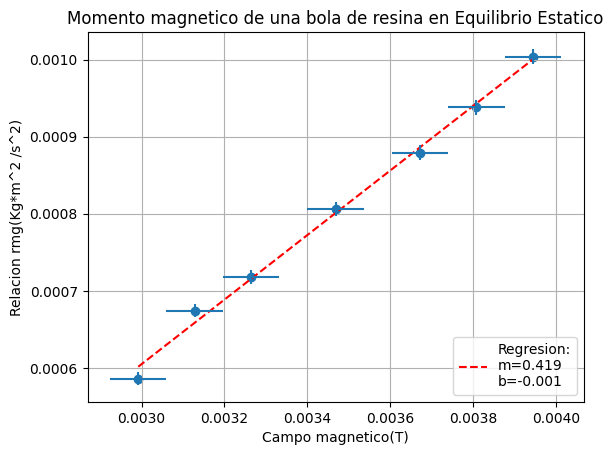

In [129]:
param,cov =np.polyfit(act1['B(T)'],act1['rmg'],1,cov=True)
m=param[0]
b=param[1]
xregression=np.linspace(np.min(act1['B(T)']),np.max(act1['B(T)']),7)
plt.plot(xregression,xregression*m+b,color='r',linestyle='--',label='Regresion:\nm='+str(round(m,3))+'\nb='+str(round(b,3)))
plt.scatter(act1['B(T)'],act1['rmg'])
plt.title('Momento magnetico de una bola de resina en Equilibrio Estatico')
plt.errorbar(act1['B(T)'],act1['rmg'],xerr=np.ones(len(act1['B(T)']))*0.05*1.36E-3,yerr=act1['rmg_error'],ls='none')
plt.xlabel('Campo magnetico(T)')
plt.ylabel('Relacion rmg(Kg*m^2 /s^2)')
plt.grid()
plt.legend(loc=4)
plt.savefig('Act1')
plt.show()
print()

In [130]:
print('mu: '+str(m)+'|Incertidumbre: '+str(cov[0][0]))

mu: 0.4186957388377033|Incertidumbre: 0.00015744096105100842


Grafica actividad 2

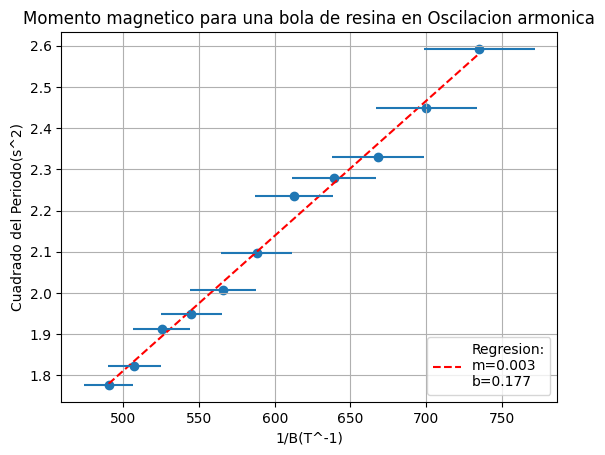

In [131]:
param,cov =np.polyfit(act2['1/B'],act2['T2'],1,cov=True)
m=param[0]
b=param[1]
xregression=np.linspace(np.min(act2['1/B']),np.max(act2['1/B']),10)
plt.plot(xregression,xregression*m+b,color='r',linestyle='--',label='Regresion:\nm='+str(round(m,3))+'\nb='+str(round(b,3)))
plt.scatter(act2['1/B'],act2['T2'])
plt.errorbar(act2['1/B'],act2['T2'],yerr=np.ones(len(act2['T2']))*0.0001,xerr=0.05/(1.36E-3*(act2['Corriente']**2)),ls='none')
plt.title('Momento magnetico para una bola de resina en Oscilacion armonica')
plt.xlabel('1/B(T^-1)')
plt.ylabel('Cuadrado del Periodo(s^2)')
plt.legend(loc=4)
plt.grid()
plt.savefig('Act2')
plt.show()

In [132]:
mu=1/m*4*(np.pi**2)*2/5*(141.3/1000)*(5.3/200)**2
print('mu: '+str(mu)+'|Incertidumbre: '+str(1/cov[0][0]*4*np.pi**2*2/5*(141.3/1000)*(5.3/200)**2))

mu: 0.4791743431495073|Incertidumbre: 164558.2806816353


Grafica Actividad 3

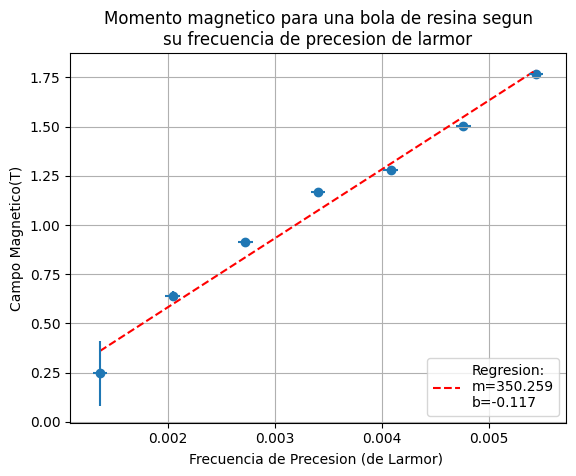

In [133]:
param,cov =np.polyfit(act3['B (T)'],act3['precsion'],1,cov=True)
m=param[0]
b=param[1]
xregression=np.linspace(np.min(act3['B (T)']),np.max(act3['B (T)']),10)
plt.plot(xregression,xregression*m+b,color='r',linestyle='--',label='Regresion:\nm='+str(round(m,3))+'\nb='+str(round(b,3)))
plt.scatter(act3['B (T)'],act3['precsion'])
plt.errorbar(act3['B (T)'],act3['precsion'],xerr=np.ones(len(act3['B (T)']))*0.05*1.36E-3,yerr=act3['precesion_error'],ls='none')
plt.title('Momento magnetico para una bola de resina segun\nsu frecuencia de precesion de larmor')
plt.ylabel('Campo Magnetico(T)')
plt.xlabel('Frecuencia de Precesion (de Larmor) ')
plt.legend(loc=4)
plt.grid()
plt.savefig('Act3')
plt.show()

In [134]:
mu=0
print('mu: '+str(mu)+'|Incertidumbre: '+str(cov[0][0]*4*np.pi**2*2/5*(141.3/1000)*(5.3/200)**2))

mu: 0|Incertidumbre: 0.7976343667470427
